## Euler's Method

### Algorithm

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a. Calculate the slope of the function at the current time and value of y     using the given differential equation.
  b. Calculate the new value of y using the formula: y(i) = y(i-1) + h * slope(i-1).
  c. Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```




In [44]:
def euler_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [45]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_E,y_E=euler_method(f, 0, 1, 1,0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0105
----------------------
3	0.30	1.0316
----------------------
4	0.40	1.0634
----------------------
5	0.50	1.1063
----------------------
6	0.60	1.1605
----------------------
7	0.70	1.2267
----------------------
8	0.80	1.3054
----------------------
9	0.90	1.3974
----------------------
10	1.00	1.5036
----------------------


In [46]:
y_E

[1,
 1.0,
 1.0105170918075648,
 1.0316056584428253,
 1.0634309733561431,
 1.1062703457846559,
 1.160515438276203,
 1.2266757744876338,
 1.305383467785918,
 1.397399213856573,
 1.5036196035866105]

In [47]:
import numpy as np
def f1(t,y):
  return np.exp(t-y)

In [48]:
t_d,y_d=euler_method(f1, 0, 1, 1,0.25)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.25	1.0920
----------------------
2	0.50	1.1997
----------------------
3	0.75	1.3239
----------------------
4	1.00	1.4647
----------------------


## RK-4 Method

### Algorithm

To solve:$\dfrac{dy}{dx}=f(x,y)$

$x_{i+1} = x_i + h,\\y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)h\\ k_1 = \ f(x_i, y_i),\\ k_2 =  f(x_i + 0.5h, y_i + 0.5 k_1),\\ k_3 =  f(x_i + 0.5h, y_i + 0.5 k_2).\\ k_4 = f(x_i + h, y_i + k_3),
 \\ $

```
Function will take following input:(f,t_initial,t_final,y_initial,h)
f(t,y) from y'= f(t,y)
t_initial(starting point of domain)
t_final(ending point of domain)
y_initial(initial condition)
h(step size)


1 Initialize the initial value of y and the initial time t.

2 Set the number of steps n = (t_final - t_initial) / h.

3 Loop from i = 1 to i = n:
  a)Calculate
      k1 =  f(x0, y0)
      k2 =  f(x0+h/2, y0+k1/2)
      k3 =  f(x0+h/2, y0+k2/2)
      k4 =  f(x0+h, y0+k3)

  b) Calculate the new value of y using the formula: y(i) = y(i-1) + (k1+2*k2+2*k3+k4)*h/6
  c) Update the value of time t(i) = t(i-1) + h.

4 Return the values of time and y at each step.
```

In [49]:
def RK4_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i]+0.5*h, y_values[i]+0.5*k1*h)
        k3 = f(t_values[i]+h/2, y_values[i]+h*k2/2)
        k4 = f(t_values[i]+h, y_values[i]+h*k3)
        y_new = y_values[i] + (h/6) * (k1+2*k2+2*k3+k4)
        t_new = t_values[i] + h
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values


In [50]:
import numpy as np
def f(t,y):
  return np.exp(t)-y

t_R,y_R=RK4_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0050
----------------------
2	0.20	1.0201
----------------------
3	0.30	1.0453
----------------------
4	0.40	1.0811
----------------------
5	0.50	1.1276
----------------------
6	0.60	1.1855
----------------------
7	0.70	1.2552
----------------------
8	0.80	1.3374
----------------------
9	0.90	1.4331
----------------------
10	1.00	1.5431
----------------------


## Library Function to solve ODE(IVP)

In [51]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t-y)
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
t_l=sol.t
y_l=sol.y.flatten()
print('\n----Library_SOLUTION-------')
print('----------------------')    
print('#\ttn\tyn')
print('----------------------')

for i in range(len(t_l)):
   print('%d\t%.2f\t%.4f'% (i+1,t_l[i],y_l[i]) )
   print('----------------------')
   


----Library_SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0380
----------------------
2	0.20	1.0783
----------------------
3	0.30	1.1211
----------------------
4	0.40	1.1663
----------------------
5	0.50	1.2140
----------------------
6	0.60	1.2642
----------------------
7	0.70	1.3169
----------------------
8	0.80	1.3721
----------------------
9	0.90	1.4298
----------------------
10	1.00	1.4899
----------------------


In [52]:
t_l=sol.t
print(t_l)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [53]:
import numpy as np
from scipy.integrate import solve_ivp
def f(t,y):
  return np.exp(t)-y
sol = solve_ivp(f, [0, 1], [1], t_eval=np.array(np.linspace(0.1,1,10)))
print(sol.y.flatten())
print(sol.t)
y_l=sol.y.flatten()
t_l=sol.t

[1.00500417 1.0200103  1.04514216 1.08073618 1.12721258 1.18507425
 1.25490676 1.33737837 1.43324001 1.54332529]
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


## Plotting 

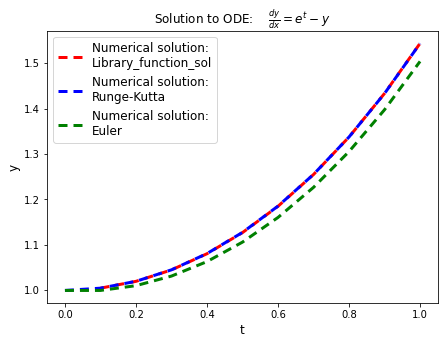

In [54]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(7,5))


plt.plot(t_l, y_l, label="Numerical solution:\nLibrary_function_sol", dashes=(3,2), color="red",lw=3)
plt.plot(t_R, y_R, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",lw=3)
plt.plot(t_E, y_E, label="Numerical solution:\nEuler", dashes=(3,2), color="green",lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=e^t -y$")
plt.xlabel("t", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


##Lab Task
```
1- Write the program for Heun's Method.
2- Write the code to make a table to compare error of Heun's, Euler's, RK4 by using analytical solution.
3- Repeat task 2 for three different DEs.



In [55]:
# Required libraries
import numpy as np
from scipy.integrate import solve_ivp
from tabulate import tabulate

In [56]:
# Heun's Method
def f(t,y):
    return np.exp(t)-y

def heun_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        slope_new = f(t_new, y_new)
        y_new = y_values[i] + h * (slope + slope_new) / 2
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values

t_H,y_H=heun_method(f, t_initial=0, t_final=1, y_initial=1,h= 0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0053
----------------------
2	0.20	1.0206
----------------------
3	0.30	1.0461
----------------------
4	0.40	1.0820
----------------------
5	0.50	1.1288
----------------------
6	0.60	1.1869
----------------------
7	0.70	1.2568
----------------------
8	0.80	1.3393
----------------------
9	0.90	1.4352
----------------------
10	1.00	1.5454
----------------------


In [57]:
# Write the code to make a table to compare errors of Heun's, Euler's, RK4

def error(y_exact,y_approx):
    return abs(y_exact-y_approx)

# Heun's Method
def heun_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        slope = f(t_values[i], y_values[i])
        y_new = y_values[i] + h * slope
        t_new = t_values[i] + h
        slope_new = f(t_new, y_new)
        y_new = y_values[i] + h * (slope + slope_new) / 2
        y_values.append(y_new)
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values

# Euler's Method
def euler_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Euler's method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        y_new = y_values[i] + h * f(t_values[i], y_values[i])
        y_values.append(y_new)
        t_new = t_values[i] + h
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values

# Runge-Kutta Method
def runge_kutta_method(f, t_initial, t_final, y_initial, h):
    """
    Solves the ordinary differential equation y' = f(t, y) using Runge-Kutta method with step size h.
    Returns arrays of time and y values at each step.
    """
    num_steps = int((t_final - t_initial) / h)
    t_values = [t_initial]
    y_values = [y_initial]
    print('\n-------SOLUTION-------')
    print('----------------------')    
    print('#\ttn\tyn')
    print('----------------------')
    for i in range(num_steps):
        k1 = f(t_values[i], y_values[i])
        k2 = f(t_values[i] + h / 2, y_values[i] + h * k1 / 2)
        k3 = f(t_values[i] + h / 2, y_values[i] + h * k2 / 2)
        k4 = f(t_values[i] + h, y_values[i] + h * k3)
        y_new = y_values[i] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_new)
        t_new = t_values[i] + h
        t_values.append(t_new)
        print('%d\t%.2f\t%.4f'% (i+1,t_new,y_new) )
        print('----------------------')
    return t_values,y_values

In [58]:
def error_table(f,t_initial,t_final,y_initial,h):
  num_steps = int((t_final - t_initial) / h)
  data=[]

  sol = solve_ivp(f, [t_initial, t_final], [1], t_eval=np.array(np.linspace(t_initial+h,t_final,num_steps)))
  y_l_a=sol.y.flatten()
  y_l=np.insert(y_l_a,0,y_initial)
  t_E,y_E=euler_method(f,t_initial,t_final,y_initial,h)
  t_H,y_H=heun_method(f,t_initial,t_final,y_initial,h)
  t_R,y_R=runge_kutta_method(f,t_initial,t_final,y_initial,h)

 
  er1=error(y_l,y_E)
  er2=error(y_l,y_H)
  er3=error(y_l,y_R)

  print('\n-------------------------ERRORS-------------------------------')
  print('--------------------------------------------------------------')
  print('#\tStep\tEuler Error\tHeun Error\tRK4 Error')
  print('--------------------------------------------------------------')
  for i in range(len(t_E)):
        print('%d\t%.2f\t%.6f\t%.6f\t%.6f' % (i+1, t_E[i], er1[i], er2[i], er3[i]))
        print('--------------------------------------------------------------')
  if(er1.all()<er2.all() and er1.all()<er3.all()):
    print('After comparision best method is EULER')
  elif(er2.all()<er1.all() and er2.all()<er3.all()):
    print('After comparision best method is HEUNs')
  else:
    print('After comparision best method is RK4')

In [59]:
def f(t,y):
  return np.exp(t)-y
error_table(f,0,1,1,0.1)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0000
----------------------
2	0.20	1.0105
----------------------
3	0.30	1.0316
----------------------
4	0.40	1.0634
----------------------
5	0.50	1.1063
----------------------
6	0.60	1.1605
----------------------
7	0.70	1.2267
----------------------
8	0.80	1.3054
----------------------
9	0.90	1.3974
----------------------
10	1.00	1.5036
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0053
----------------------
2	0.20	1.0206
----------------------
3	0.30	1.0461
----------------------
4	0.40	1.0820
----------------------
5	0.50	1.1288
----------------------
6	0.60	1.1869
----------------------
7	0.70	1.2568
----------------------
8	0.80	1.3393
----------------------
9	0.90	1.4352
----------------------
10	1.00	1.5454
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.10	1.0050
----------

In [60]:
def f(t,y):
  return np.sin(3*t)+np.cos(2*t)
error_table(f,0,1,1,0.25)



-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.25	1.2500
----------------------
2	0.50	1.6398
----------------------
3	0.75	2.0243
----------------------
4	1.00	2.2365
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.25	1.3199
----------------------
2	0.50	1.7070
----------------------
3	0.75	2.0054
----------------------
4	1.00	2.0771
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.25	1.3292
----------------------
2	0.50	1.7305
----------------------
3	0.75	2.0415
----------------------
4	1.00	2.1181
----------------------

-------------------------ERRORS-------------------------------
--------------------------------------------------------------
#	Step	Euler Error	Heun Error	RK4 Error
--------------------------------------------------------------
1	0.00	0.000000	0.000000	0.000000
----------------------------------------------------------

In [61]:
def f(t,y):
  return np.sin(t)+np.exp(-t)
error_table(f,0,1,0,0.5)


-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.50	0.5000
----------------------
2	1.00	1.0430
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.50	0.5215
----------------------
2	1.00	1.0953
----------------------

-------SOLUTION-------
----------------------
#	tn	yn
----------------------
1	0.50	0.5159
----------------------
2	1.00	1.0918
----------------------

-------------------------ERRORS-------------------------------
--------------------------------------------------------------
#	Step	Euler Error	Heun Error	RK4 Error
--------------------------------------------------------------
1	0.00	0.000000	0.000000	0.000000
--------------------------------------------------------------
2	0.50	1.015915	0.994426	1.000017
--------------------------------------------------------------
3	1.00	1.048840	0.996502	0.999976
--------------------------------------------------------------
After comparision best 